In [44]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [3]:
print('Train images:', total_train)
print('Validation images:',total_val)
print('Test images:',total_test)

Train images: 2001
Validation images: 1001
Test images: 51


In [4]:
# 3
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)

train_data_gen = train_image_generator.flow_from_directory(
        train_dir,  # this is the target directory
        target_size=(IMG_HEIGHT, IMG_WIDTH),  # all images will be resized to 150x150
        batch_size=batch_size,
        class_mode='binary',
        shuffle=True,
        seed=42)

val_data_gen = validation_image_generator.flow_from_directory(
        validation_dir,  # this is the target directory
        target_size=(IMG_HEIGHT, IMG_WIDTH),  # all images will be resized to 150x150
        batch_size=batch_size,
        class_mode='binary',
        shuffle=True,
        seed=42)

test_data_gen = test_image_generator.flow_from_directory(
        test_dir,  # this is the target directory
        target_size=(IMG_HEIGHT, IMG_WIDTH),
        classes=['.'],
        shuffle=False)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


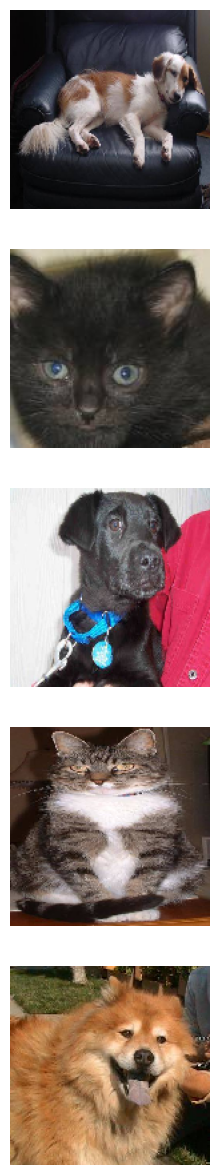

In [5]:
# 4
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


In [6]:
# 5
train_image_generator = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        rotation_range=10,
        horizontal_flip=True)


Found 2000 images belonging to 2 classes.


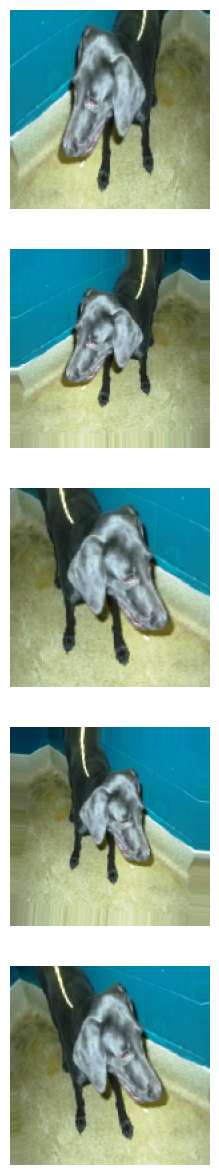

In [7]:
# 6
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [ ]:
# 7
model = Sequential()

# block 1
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
model.add(MaxPooling2D((2, 2)))
# block 2
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
# block 3
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.summary()


model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [81]:
# 8

history = model.fit_generator(train_data_gen, steps_per_epoch=len(train_data_gen),
	validation_data=val_data_gen, validation_steps=len(val_data_gen), epochs=epochs, verbose=1)

<ipython-input-81-e945f0e52d6f>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_data_gen, steps_per_epoch=len(train_data_gen),


Epoch 1/15
16/16 [==============================] - 17s 975ms/step - loss: 6.9618 - accuracy: 0.5240 - val_loss: 0.6826 - val_accuracy: 0.5750
Epoch 2/15
16/16 [==============================] - 15s 926ms/step - loss: 0.7247 - accuracy: 0.5795 - val_loss: 0.7003 - val_accuracy: 0.5670
Epoch 3/15
16/16 [==============================] - 16s 975ms/step - loss: 0.7238 - accuracy: 0.6065 - val_loss: 1.2154 - val_accuracy: 0.5340
Epoch 4/15
16/16 [==============================] - 15s 942ms/step - loss: 0.6667 - accuracy: 0.6230 - val_loss: 0.6699 - val_accuracy: 0.6100
Epoch 5/15
16/16 [==============================] - 16s 990ms/step - loss: 0.6790 - accuracy: 0.6290 - val_loss: 0.6392 - val_accuracy: 0.6390
Epoch 6/15
16/16 [==============================] - 15s 922ms/step - loss: 0.6418 - accuracy: 0.6420 - val_loss: 0.9513 - val_accuracy: 0.5300
Epoch 7/15
16/16 [==============================] - 15s 956ms/step - loss: 0.6409 - accuracy: 0.6420 - val_loss: 0.5956 - val_accuracy: 0.6850

In [ ]:
# 9
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [83]:
# 10
probabilities = model.predict_generator(test_data_gen,len(test_data_gen))

<ipython-input-83-a7bd3924403d>:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  probabilities = model.predict_generator(test_data_gen,len(test_data_gen))


In [84]:
# 11
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if np.round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

Your model correctly identified 70.0% of the images of cats and dogs.
You passed the challenge!
